# Apache Flink
Implement the k-means clustering algorithm in Apache Flink.

Optional: implement the same algorithm in OpenMP/MPI and compare the performance of the two implementations (processing time and scalability) under various workloads.

In [24]:
import csv
import random
import sys

import numpy
import os  # We need this module
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets.samples_generator import make_blobs
sns.set()  # for plot styling
plt.style.use('seaborn-whitegrid')
fig_width = 12
fig_height = 10

#Samples
N_SAMPLES = 100000

# Get path of the current dir, then use it to create paths:
CURRENT_DIR        = os.path.dirname(os.path.abspath("flink_k-means.ipynb"))
points_path        = os.path.join(CURRENT_DIR, 'files/input/points_100000.csv')
centroids_path     = os.path.join(CURRENT_DIR, 'files/input/centroids.csv')
new_points_path    = os.path.join(CURRENT_DIR, 'files/output/new_points.csv')
new_centroids_path = os.path.join(CURRENT_DIR, 'files/output/new_centroids.csv')
objval_path        = os.path.join(CURRENT_DIR, 'files/output/objfun.csv')

# Initial dataset

## Points in the initial dataset
- dataset of 100.000 points, randomly generated
- points are already divided into clusters

In [25]:
print('X,Y')
with open(points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for i,row in enumerate(reader):
        print(row['X'], row['Y'])
        if(i >= 10):
            break
            
print("Total points: %s" % format(N_SAMPLES,',d'))

X,Y
-6.030655427827744 7.010503797942845
1.44888315638322 5.649841687086858
5.2113349965879365 5.111332892148602
8.169049731285268 -3.0299071227666934
-6.7566857968809675 0.5102043195659359
-6.565675459872967 0.2973336285548338
-5.0923491919544706 7.200424641047177
-9.28377274405066 -4.471524504982716
8.885145705359779 -2.2490604605130797
-10.541767848895473 -5.948723542953223
-5.506572521654158 8.263395622666037
Total points: 100,000


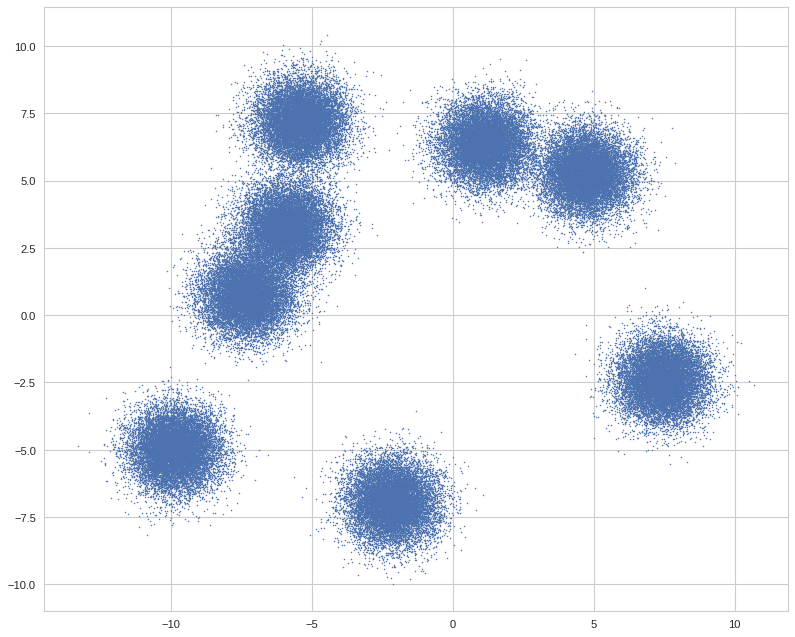

In [26]:
x = numpy.zeros(N_SAMPLES)
y = numpy.zeros(N_SAMPLES)

# Read the dataset from the CVS file
with open(points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        i=i+1

# Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], s=1)
plt.show()

## Initial centroids
Initial centroids can be
- randomly placed at runtime
    - recreated if too close with the "recompnearest" input parameter
- read from the input file

##### Add header row to centroids

In [16]:
with open(centroids_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)

In [27]:
print('Cluster,X,Y')
centroids = 0
with open(centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Cluster'], row['X'], row['Y'])
        centroids = centroids + 1
print("Total centroids: %d" % centroids)

Cluster,X,Y
0 -6.4996390976529295 -4.547264999578333
1 6.534180113636655 -2.488343051409096
2 9.383963677452972 13.631449459607751
3 -9.500499218343863 5.884396961266557
4 8.890352795564372 13.027356262944053
5 9.93075300901236 6.052005456020023
6 13.034049573603387 -1.1265485014145966
7 -11.622709868541028 5.462999295973049
Total centroids: 8


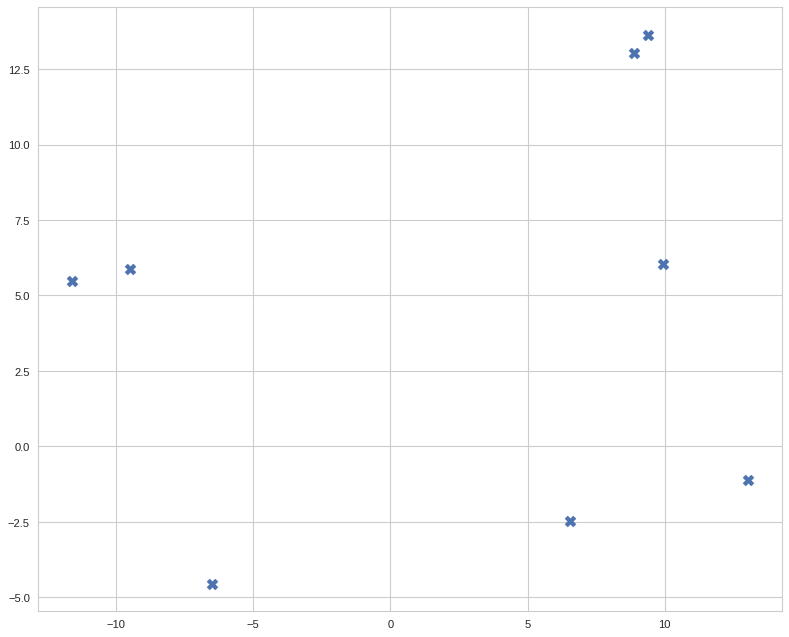

In [28]:
x = numpy.zeros(centroids)
y = numpy.zeros(centroids)

#Read the dataset from the CVS file
with open(centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        i=i+1

#Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], marker="X", s=100)
plt.show()

# Run Flink

# Result dataset

##### Add header row to files

In [19]:
with open(new_centroids_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)
    
with open(new_points_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)

## Plot new centroids

In [29]:
print('Cluster,X,Y')
centroids = 0
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Cluster'], row['X'], row['Y'])
        centroids = centroids + 1
print("Total centroids: %d" % centroids)

Cluster,X,Y
0 -6.018177389534398 -5.970154788636278
1 6.813505758850471 -2.487312645046373
3 -5.415092157412377 6.989688821546183
4 1.1210729942909556 6.365985074051813
5 4.724413665164045 5.2708556118124825
6 8.076399852912724 -2.338271813271596
7 -6.680309422780709 1.8805588389912962
Total centroids: 7


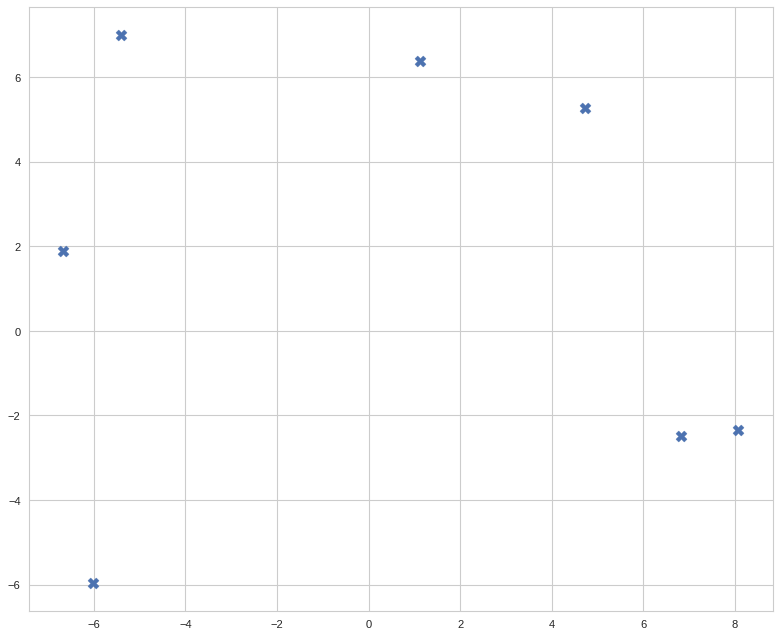

In [30]:
x = numpy.zeros(centroids)
y = numpy.zeros(centroids)

#Read the dataset from the CVS file
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        #print(x[i], y[i])
        i=i+1
        
#Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], marker="X", s=100)
plt.show()

## Plot points + new centroids

0 7
No: 7


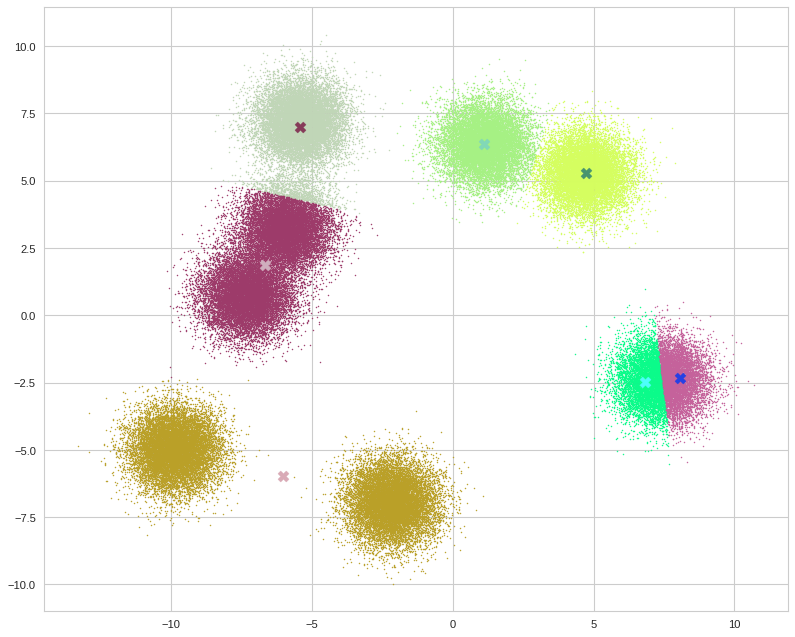

Obj val: 567526.857239


In [31]:
x = numpy.zeros(N_SAMPLES)
y = numpy.zeros(N_SAMPLES)
c = numpy.zeros(N_SAMPLES)
cx = list()
cy = list()
cc = list()

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')

# Read the new centroids from the CVS file
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cx.append(float(row['X']))
        cy.append(float(row['Y']))
        cc.append(int(row['Cluster']))

# Read the new dataset from the CVS file
with open(new_points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        c[i] = row['Cluster']
        # print(x[i], y[i])
        i = i + 1

minK = (int)(c.min())
maxK = (int)(c.max())
print (minK, maxK)

k = (int)(maxK - minK + 1)

# plot the points for each cluster with a different color
for i in range(minK, maxK+1):
    x2 = list()
    y2 = list()

    for j in range(N_SAMPLES):
        if c[j] == i:
            x2.append(x[j])
            y2.append(y[j])

    # Plot the read dataset
    color1 = numpy.random.rand(3,)
    plt.scatter(x2[:], y2[:], c=color1, s=1)
        
for i in range(maxK+1):
    color2 = numpy.random.rand(3,)
    try:
        plt.scatter(cx[i], cy[i], c=color2, marker="X", edgecolor=color2, s=100)
    except:
        print ("No: %d" % i)

plt.show()

with open(objval_path) as objval_file:
    objval = float(objval_file.readline())
print("Obj val: %f" % objval)

## Compute objective function

In [32]:
import math

# read the clusters
clusters = list()
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        clusters.append([int(row['Cluster']), float(row['X']), float(row['Y'])])
    
print ("Clusters: %d" % len(clusters))

points = list()
with open(new_points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        cp = int(row['Cluster'])
        xp = float(row['X'])
        yp = float(row['Y'])
        points.append([cp, xp, yp])
        
print ("Points: %d " % len(points))
        
# compute the distances and the objective function      
distances = list()
for point in points:
    for cluster in clusters:
        if (cluster[0] == point[0]):
            distance = math.sqrt((point[1] - cluster[1]) * (point[1] - cluster[1]) 
                                 + (point[2] - cluster[2]) * (point[2] - cluster[2]))
            distance = math.pow(distance, 2)
            distances.append(distance)

print ("Distances: %d " % len(distances))

print ("Obj function: %f" % sum(distances))

Clusters: 7
Points: 100000 
Distances: 100000 
Obj function: 567526.857239


# Create new dataset

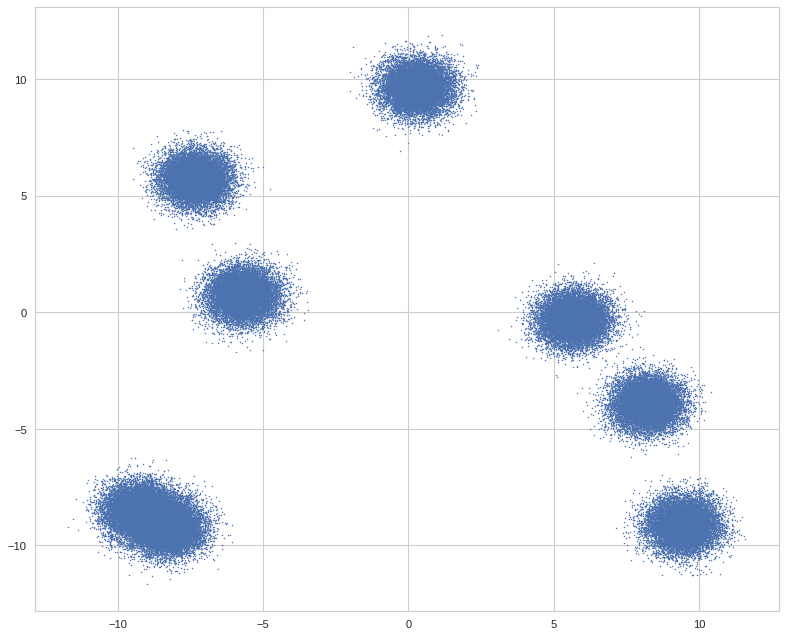

In [27]:
NEW_SAMPLES=100000
NEW_CENTERS=8
#X, y_true = make_blobs(n_samples=N_SAMPLES, centers=4, cluster_std=0.60, random_state=3320)
X, y_true = make_blobs(n_samples=NEW_SAMPLES, centers=NEW_CENTERS, cluster_std=0.60)

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

## Save dataset to file

In [22]:
new_points_path = os.path.join(CURRENT_DIR, 'files/input/points_' + str(NEW_SAMPLES) + '.csv')
with open(new_points_path, 'w') as csvfile:
    fieldnames = ['X', 'Y']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for x in range(NEW_SAMPLES):
        writer.writerow({'X': X[x, 0], 'Y': X[x, 1]})

-----

# Results
### Objective function value
1. Relation between number of centroids and obj function value
2. Relation between initial distance of centroids and obj function value
3. Relation between number of iterations and objective function value

### Execution time
4. Relation between number of centroids and execution time
5. Relation between number of points and the execution time and parallelism

## 1. Relation between number of centroids and obj function value (script 1)
We want to analyze the relation between the number of centroids we use and the computed objective function value
- **Add one centroid at a time, randomly generated, [1, 20] ➡ -numcentroids 1..20**
- The script is executed 5 times for every centroid and the average value is taken
- Fixed input dataset with 8 centers and 100.000 points
- 10 iterations ➡ -iterations 10
- No custom aggregator convergence ➡ -custconvergence false
- Parallelization set to 4 ➡ -p 4
- Recomputing of nearest centroid disable ➡ -recompnearest 0

  Number of centroids    Obj Function Mean Value
---------------------  -------------------------
                    1                5.90974e+06
                    2                3.30358e+06
                    3                1.99299e+06
                    4                1.32618e+06
                    5           956840
                    6           729461
                    7           470450
                    8           247065
                    9           332966
                   10           343733
                   11           187838
                   12           161924
                   13           168307
                   14           132847
                   15           135287
                   16           104812
                   17           111988
                   18           105427
                   19           116363
                   20            98575.2


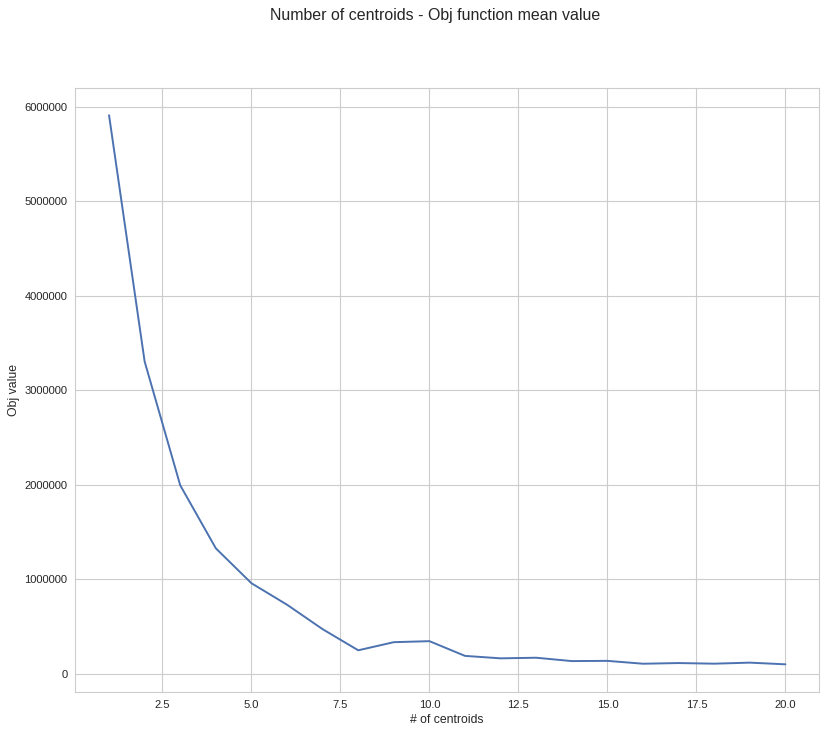

In [98]:
obj_mean_vals = list()
mink = 1
maxk = 21

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_1/results_objfun_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['objval'])
            objval_iter.append(objval)
            
    obj_mean_vals.append([i, numpy.average(objval_iter)])

from tabulate import tabulate
print (tabulate(obj_mean_vals, headers=['Number of centroids', 'Obj Function Mean Value']))

x_val = [x[0] for x in obj_mean_vals]
y_val = [x[1] for x in obj_mean_vals]

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_val,y_val)
plt.suptitle('Number of centroids - Obj function mean value')
plt.xlabel('# of centroids')
plt.ylabel('Obj value')
plt.show()

#### The value of the objective function will decrease, increasing the number of centroids until a fixed point is reached
As we can see the objective function value decreases as the number of centroid increases until a fixed point is reached and the objective function value will remain constant even if we add more centroids.

## 2. Relation between initial distance of centroids and obj function value (script 2)
- **Increasing recomputing of nearest centroid ➡ -recompnearest [0, 10, 20, ..., 100]**
- The script is executed 5 times for every recompnearest and the average value is taken
- Fixed input dataset with 8 centers and 100.000 points
- 8 randomly centroids
- Max iterations ➡ -iterations 1
- No custom aggregator convergence ➡ -custconvergence false
- Parallelization set to 4 ➡ -p 1

  Recomp nearest    Obj Function Mean Value
----------------  -------------------------
               0                     659533
              10                     611001
              20                     618168
              30                     819744
              40                     547630
              50                     660676
              60                     666810
              70                     553158
              80                     568986
              90                     520001
             100                     649310


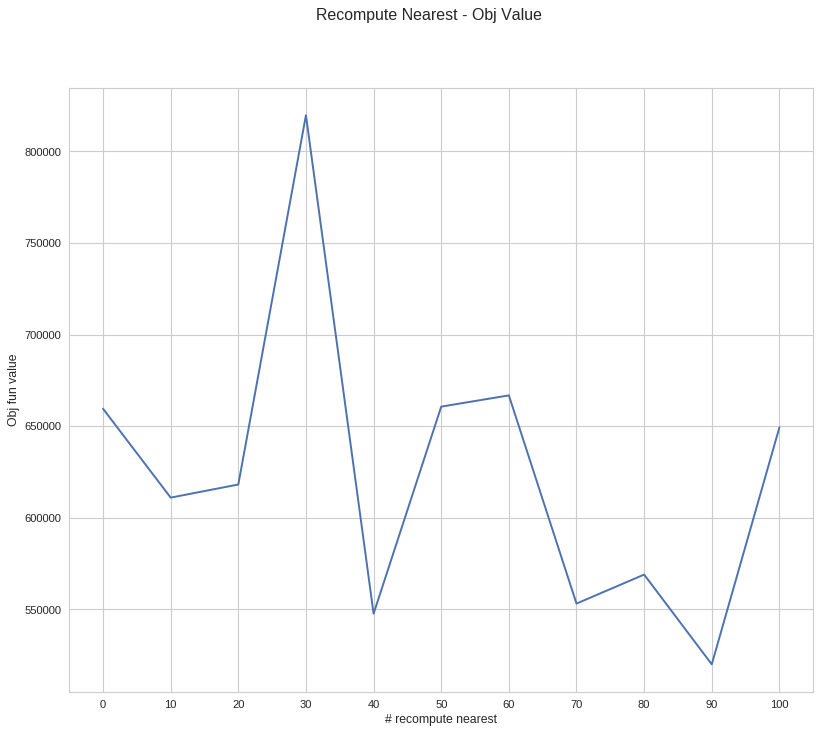

In [99]:
recomp = [0,10,20,30,40,50,60,70,80,90,100]

obj_mean_vals = list()
mink = 1
maxk = len(recomp)+1

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_2/results_objfun_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['objval'])
            objval_iter.append(objval)
            
    obj_mean_vals.append([i, numpy.average(objval_iter)])

x_val = [x[0] for x in obj_mean_vals]
y_val = [x[1] for x in obj_mean_vals]

from tabulate import tabulate
print (tabulate({"Recomp": recomp,
                 "Obj": y_val}, headers=['Recomp nearest', 'Obj Function Mean Value']))

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(x_val, recomp)
plt.plot(x_val,y_val)
plt.suptitle('Recompute Nearest - Obj Value')
plt.xlabel('# recompute nearest')
plt.ylabel('Obj fun value')
plt.show()

As we can see the objective function values does not decrease as the number of recomputation increases, due to the nature of the recomputation implemented. Indeed, the recomputation of the nearest is done regenerating one point of the nearest couple of points. This method even if tries to move points one far from another one it is not deterministic because new centroids are randomly generated and so can happen that new centroids are close even if they are recomputed a large number of times

## 3. Relation between number of iterations and objective function value (script 3)
- **Execute the script with an increasing number of iterations ➡ -iterations [1, 2, 3, ..., 15]**
- The script is executed 5 times for every iteration and the average value is taken
- Fixed input dataset with 8 centers and 100.000 points
- 8 static centroids from file
- No custom aggregator convergence ➡ -custconvergence false
- Parallelization set to max ➡ -p 1
- Recomputing of nearest centroid disable ➡ -recompnearest 0

  Iterations    Obj Function Mean Value
------------  -------------------------
           1                     541541
           2                     308055
           3                     288017
           4                     277546
           5                     270415
           6                     266614
           7                     265335
           8                     265055
           9                     265002
          10                     264993
          11                     264992
          12                     264992
          13                     264992
          14                     264992
          15                     264992


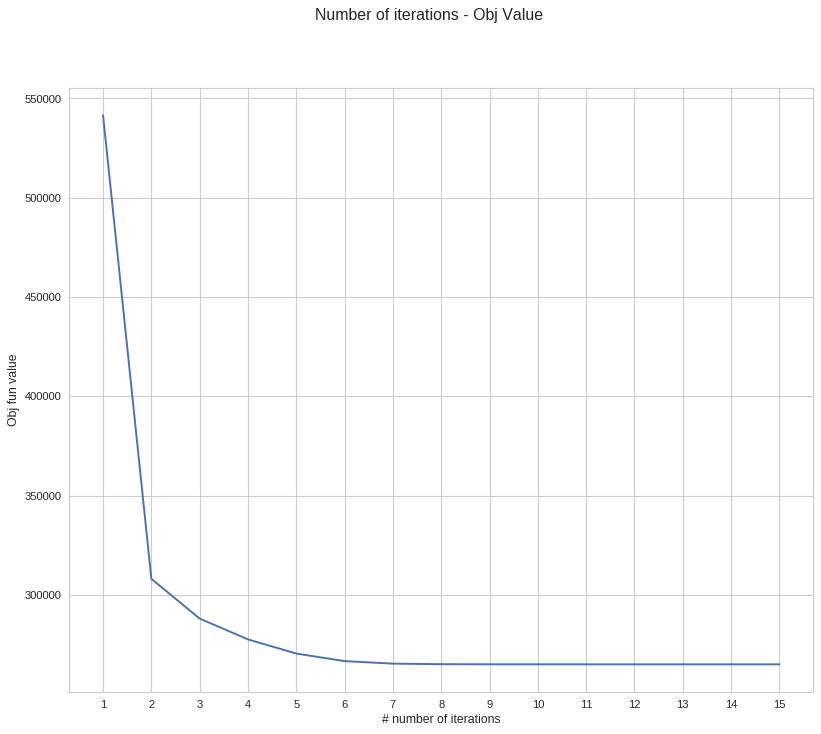

In [100]:
iterations=range(1,16)

obj_mean_vals = list()
mink = 1
maxk = len(iterations)+1

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_3/results_objfun_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['objval'])
            objval_iter.append(objval)
            
    obj_mean_vals.append([i, numpy.average(objval_iter)])

x_val = [x[0] for x in obj_mean_vals]
y_val = [x[1] for x in obj_mean_vals]

from tabulate import tabulate
print (tabulate({"Iterations": iterations,
                 "Obj": y_val}, headers=['Iterations', 'Obj Function Mean Value']))

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(x_val, iterations)
plt.plot(x_val,y_val)
plt.suptitle('Number of iterations - Obj Value')
plt.xlabel('# number of iterations')
plt.ylabel('Obj fun value')
plt.show()

The value of the objective function will decrease increasing the number of iterations until a fixed status is reached and the obj function value does not decrease even if the number of iterations increases

## 4. Relation between number of centroids and execution time (script 1)
- **Add one centroid at a time, randomly generated [1, 20] ➡ -numcentroids 1..20**
- The script is executed 5 times for every centroid and the average value is taken
- Fixed input dataset with 8 centers
- Max iterations ➡ -iterations 100
- No custom aggregator convergence ➡ -custconvergence true
- Parallelization set to 1 ➡ -p 1
- Recomputing of nearest centroid disable ➡ -recompnearest 0

  Centroids    Executione Time [ms]
-----------  ----------------------
          1                  2046.2
          2                  1808.6
          3                  2711
          4                  2106.4
          5                  2028.8
          6                  2306
          7                  1739.2
          8                  1865
          9                  1837.4
         10                  1641
         11                  1832.2
         12                  1895.6
         13                  1765.8
         14                  1802
         15                  1729
         16                  1739.4
         17                  1682.4
         18                  1754.6
         19                  1935.4
         20                  1906


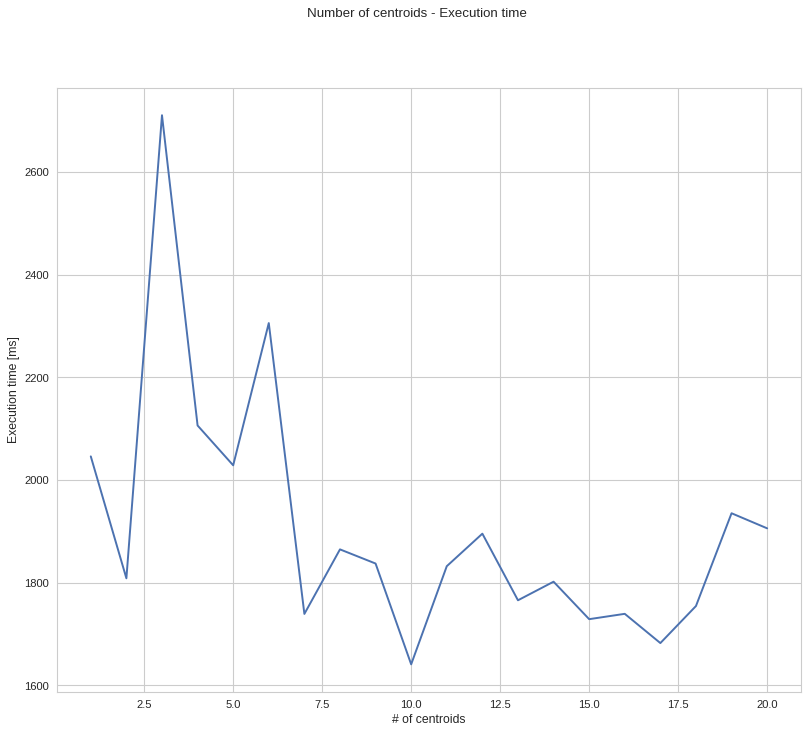

Min value: 1641.00
Max value: 2711.00
Range: 1070.00


In [2]:
num_centroids = 20

obj_mean_vals = list()
mink = 1
maxk = num_centroids+1

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_1-2/results_time_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['time'])
            objval_iter.append(objval)
            
    obj_mean_vals.append([i, numpy.average(objval_iter)])

from tabulate import tabulate
print (tabulate(obj_mean_vals, headers=['Centroids', 'Executione Time [ms]']))

x_val = [x[0] for x in obj_mean_vals]
y_val = [x[1] for x in obj_mean_vals]

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_val,y_val)
plt.suptitle('Number of centroids - Execution time')
plt.xlabel('# of centroids')
plt.ylabel('Execution time [ms]')
plt.show()

print("Min value: %.2f" % min(y_val))
print("Max value: %.2f" % max(y_val))
range_val = max(y_val) - min(y_val)
print("Range: %.2f" % range_val)

The execution time does not change too much increasing the number of centroids. The overhead introduced by Flink is much bigger with respect to the increment of time needed to compute the position of more centroids and so we can not observe an increment of time when adding more centroids

## 5. Relation between number of points and the execution time and parallelism (script 4)
- **Execute the script with an increasing number of point, from 100 to 10.000.000**
- The script is executed 5 times for set of points and the average value is taken
- Fixed input dataset with 8 centers
- Max iterations ➡ -iterations 10
- No custom aggregator convergence ➡ -custconvergence false
- Parallelization set to max and min ➡ -p 4, -p 1
- Recomputing of nearest centroid disable ➡ -recompnearest 0

  Number of points    Executione Time 4P [ms]    Executione Time 1P [ms]
------------------  -------------------------  -------------------------
               100                     2766.6                      711.2
              1000                     2737.2                      599.8
             10000                     2734.6                      846
            100000                     4021.2                     2263
           1000000                    12152.6                    15155.4
          10000000                    90796.6                   150097


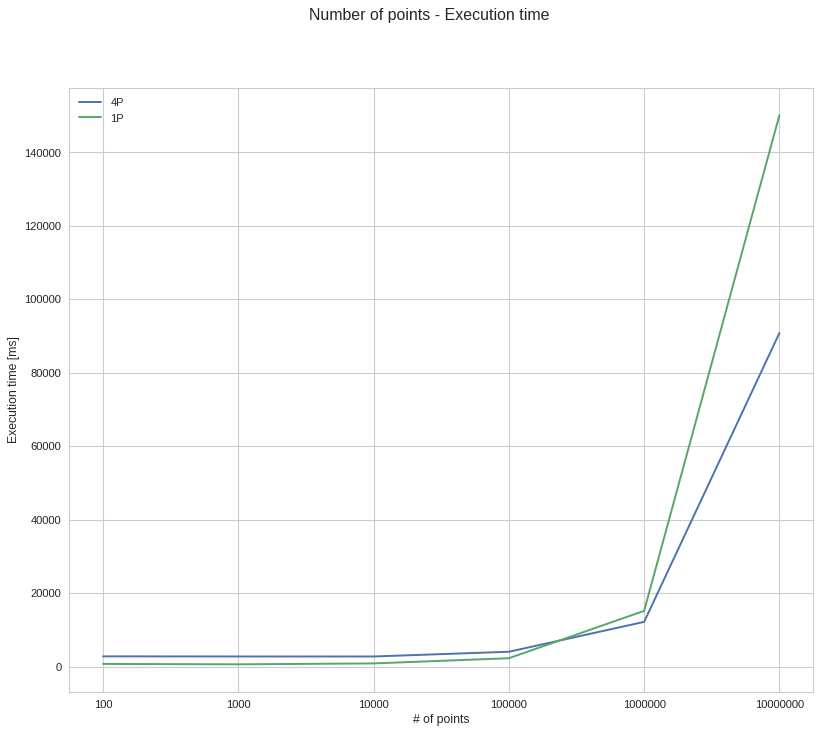

In [77]:
num_of_points = [100,1000,10000,100000,1000000,10000000]
obj_mean_vals_4p = list() # -p 4
obj_mean_vals_1p = list() # -p 1

mink = 1
maxk = len(num_of_points)+1

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_4-1/results_time_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['time'])
            objval_iter.append(objval)
            
    obj_mean_vals_4p.append([i, numpy.average(objval_iter)])
    
for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, 'script_results/script_4-2/results_time_' + str(i) + '.csv')
    
    objval_iter = list()
    with open(fixed_path_objfun) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            iter = int(row['iter'])
            objval = float(row['time'])
            objval_iter.append(objval)
            
    obj_mean_vals_1p.append([i, numpy.average(objval_iter)])

x_val_4p = [x[0] for x in obj_mean_vals_4p]
y_val_4p = [x[1] for x in obj_mean_vals_4p]
x_val_1p = [x[0] for x in obj_mean_vals_1p]
y_val_1p = [x[1] for x in obj_mean_vals_1p]

from tabulate import tabulate
print (tabulate({"Iteration": num_of_points,
                 "4P": y_val_4p,
                 "1P": y_val_1p}, headers=['Number of points', 'Executione Time 4P [ms]', 'Executione Time 1P [ms]']))

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(x_val_4p, num_of_points)
plt.xticks(x_val_1p, num_of_points)
line_4p, = plt.plot(x_val_4p,y_val_4p, label='4P')
line_2p, = plt.plot(x_val_1p,y_val_1p, label='1P')
plt.legend(handles=[line_4p, line_2p])
plt.suptitle('Number of points - Execution time')
plt.xlabel('# of points')
plt.ylabel('Execution time [ms]')
plt.show()

### The execution time will increase, increasing the number of points. The execution time should be lower using an higher parallelism

As we can see the execution time increases with the number of points. Between 100 and 100.000 points the execution is faster using a parallelism of 1 while from 1.000.000 on the execution is faster using a parallelism of 4.

Parallelizing an application causes overhead, and data has to be distributed and shared between processes and threads. In particular, Flink distributes data across TaskManager and so starting and coordinating task is an expensive operation.

For these reasons the execution with a parallelism higher than 1 can be faster when scaling a large application on multiple machines while in this case the overhead caused by the data distribution and task coordination is not negligeable